<div class="alert alert-block alert-success">
<a id='business'>
<font color = '#006400'> 
    
# Group C3 Project - Analysis of house prices in Lisbon</font>
</a>
    
</div>

<div class="alert alert-block alert-warning">

<a id='stats'></a>

## Finding Realistic House Deals
    
</div>

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import math

In [8]:
final_df=pd.read_csv("final_df.csv")
final_df

,Unnamed: 0,HouseID,Title,Parish,Price,Gross_Area,Typology,Price per Square Meter,Website
0,0,32621128.0,Estúdio T0 à venda em Bica - Santa Catarina,Misericórdia,395000.0,61.0,T0,6475.0,Idealista
1,1,32598993.0,"Estúdio T0 à venda na avenida 24 de Julho, 178",Estrela,265000.0,36.0,T0,7361.0,Idealista
2,2,32598992.0,"Estúdio T0 à venda na avenida 24 de Julho, 178",Estrela,260000.0,40.0,T0,6500.0,Idealista
3,3,31580565.0,Estúdio T0 à venda em Principe Real - Praça da...,Santo António,425000.0,36.0,T0,11806.0,Idealista
4,4,32503498.0,Estúdio T0 à venda na praceta Pátio Salema s/n,Arroios,525000.0,54.0,T0,9722.0,Idealista
...,...,...,...,...,...,...,...,...,...
16653,16839,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,395000.0,85.0,T4+,4647.0,Supercasa
16654,16840,,"Moradia T5 em São Vicente, Lisboa",São Vicente,650000.0,70.0,T4+,9286.0,Supercasa
16655,16841,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,480000.0,80.0,T4+,6000.0,Supercasa
16656,16842,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,395000.0,96.0,T4+,4115.0,Supercasa


<div class="alert alert-block alert-warning">

<a id='basic'></a>

# Assumptions
    
</div>

- Salary of 2100€/month &rarr; 1400€/month net salary
- Single  
- 7%  increase in annual savings 

__Function to calculate the years of saving required to pay the downpayment__

In [14]:


def calculate_savings_years(target_savings_goal, annual_savings, annual_savings_increase):
    savings = 0
    years = 0

    while savings < target_savings_goal:
        savings += annual_savings
        annual_savings *= (1 + annual_savings_increase)
        years += 1

    years_decimal = round(years - 1 + (target_savings_goal - (savings - annual_savings)) / annual_savings, 2)

    return years_decimal

target_savings_goal = 79000
annual_savings = 5040
annual_savings_increase = 0.07

years_required = calculate_savings_years(target_savings_goal, annual_savings, annual_savings_increase)
years_required

10.95

__"Downpay" and remaining cost calculation"__

In [10]:
final_df["Downpay"]=final_df["Price"]*0.2
final_df["Remaining cost"]=final_df["Price"]*0.8
final_df

,Unnamed: 0,HouseID,Title,Parish,Price,Gross_Area,Typology,Price per Square Meter,Website,Downpay,Remaining cost
0,0,32621128.0,Estúdio T0 à venda em Bica - Santa Catarina,Misericórdia,395000.0,61.0,T0,6475.0,Idealista,79000.0,316000.0
1,1,32598993.0,"Estúdio T0 à venda na avenida 24 de Julho, 178",Estrela,265000.0,36.0,T0,7361.0,Idealista,53000.0,212000.0
2,2,32598992.0,"Estúdio T0 à venda na avenida 24 de Julho, 178",Estrela,260000.0,40.0,T0,6500.0,Idealista,52000.0,208000.0
3,3,31580565.0,Estúdio T0 à venda em Principe Real - Praça da...,Santo António,425000.0,36.0,T0,11806.0,Idealista,85000.0,340000.0
4,4,32503498.0,Estúdio T0 à venda na praceta Pátio Salema s/n,Arroios,525000.0,54.0,T0,9722.0,Idealista,105000.0,420000.0
...,...,...,...,...,...,...,...,...,...,...,...
16653,16839,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,395000.0,85.0,T4+,4647.0,Supercasa,79000.0,316000.0
16654,16840,,"Moradia T5 em São Vicente, Lisboa",São Vicente,650000.0,70.0,T4+,9286.0,Supercasa,130000.0,520000.0
16655,16841,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,480000.0,80.0,T4+,6000.0,Supercasa,96000.0,384000.0
16656,16842,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,395000.0,96.0,T4+,4115.0,Supercasa,79000.0,316000.0


__30%  savings effort rate -> initial annual savings of 5040 (1400 x 0.3 x 12)__

In [11]:
final_df["Saving Years- S 30%"] = 0
for index, row in final_df.iterrows():
    downpay = row["Downpay"]
    years_required = calculate_savings_years(downpay, 5040, 0.07)
    final_df.at[index, "Saving Years- S 30%"] = years_required

__50% effort rate -> initial annual savings of 8400 (1400 x 0.5 x 12)__

In [15]:
final_df["Saving Years- S 50%"] = 0

for index, row in final_df.iterrows():
    downpay = row["Downpay"]
    years_required = calculate_savings_years(downpay, 8400, 0.07)
    final_df.at[index, "Saving Years- S 50%"] = years_required

final_df

,Unnamed: 0,HouseID,Title,Parish,Price,Gross_Area,Typology,Price per Square Meter,Website,Downpay,Remaining cost,Saving Years- S 30%,Saving Years- S 50%
0,0,32621128.0,Estúdio T0 à venda em Bica - Santa Catarina,Misericórdia,395000.0,61.0,T0,6475.0,Idealista,79000.0,316000.0,10.95,7.50
1,1,32598993.0,"Estúdio T0 à venda na avenida 24 de Julho, 178",Estrela,265000.0,36.0,T0,7361.0,Idealista,53000.0,212000.0,8.20,5.44
2,2,32598992.0,"Estúdio T0 à venda na avenida 24 de Julho, 178",Estrela,260000.0,40.0,T0,6500.0,Idealista,52000.0,208000.0,8.10,5.36
3,3,31580565.0,Estúdio T0 à venda em Principe Real - Praça da...,Santo António,425000.0,36.0,T0,11806.0,Idealista,85000.0,340000.0,11.55,7.92
4,4,32503498.0,Estúdio T0 à venda na praceta Pátio Salema s/n,Arroios,525000.0,54.0,T0,9722.0,Idealista,105000.0,420000.0,13.33,9.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16653,16839,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,395000.0,85.0,T4+,4647.0,Supercasa,79000.0,316000.0,10.95,7.50
16654,16840,,"Moradia T5 em São Vicente, Lisboa",São Vicente,650000.0,70.0,T4+,9286.0,Supercasa,130000.0,520000.0,15.29,10.85
16655,16841,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,480000.0,80.0,T4+,6000.0,Supercasa,96000.0,384000.0,12.55,8.70
16656,16842,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,395000.0,96.0,T4+,4115.0,Supercasa,79000.0,316000.0,10.95,7.50


__70% effort rate -> initial annual savings of 11760 (1400 x 0.7 x 12)__

In [16]:
final_df["Saving Years- S 70%"] = 0
for index, row in final_df.iterrows():
    downpay = row["Downpay"]
    years_required = calculate_savings_years(downpay, 11760, 0.07)
    final_df.at[index, "Saving Years- S 70%"] = years_required

final_df

,Unnamed: 0,HouseID,Title,Parish,Price,Gross_Area,Typology,Price per Square Meter,Website,Downpay,Remaining cost,Saving Years- S 30%,Saving Years- S 50%,Saving Years- S 70%
0,0,32621128.0,Estúdio T0 à venda em Bica - Santa Catarina,Misericórdia,395000.0,61.0,T0,6475.0,Idealista,79000.0,316000.0,10.95,7.50,5.71
1,1,32598993.0,"Estúdio T0 à venda na avenida 24 de Julho, 178",Estrela,265000.0,36.0,T0,7361.0,Idealista,53000.0,212000.0,8.20,5.44,4.11
2,2,32598992.0,"Estúdio T0 à venda na avenida 24 de Julho, 178",Estrela,260000.0,40.0,T0,6500.0,Idealista,52000.0,208000.0,8.10,5.36,3.99
3,3,31580565.0,Estúdio T0 à venda em Principe Real - Praça da...,Santo António,425000.0,36.0,T0,11806.0,Idealista,85000.0,340000.0,11.55,7.92,6.11
4,4,32503498.0,Estúdio T0 à venda na praceta Pátio Salema s/n,Arroios,525000.0,54.0,T0,9722.0,Idealista,105000.0,420000.0,13.33,9.33,7.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16653,16839,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,395000.0,85.0,T4+,4647.0,Supercasa,79000.0,316000.0,10.95,7.50,5.71
16654,16840,,"Moradia T5 em São Vicente, Lisboa",São Vicente,650000.0,70.0,T4+,9286.0,Supercasa,130000.0,520000.0,15.29,10.85,8.50
16655,16841,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,480000.0,80.0,T4+,6000.0,Supercasa,96000.0,384000.0,12.55,8.70,6.69
16656,16842,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,395000.0,96.0,T4+,4115.0,Supercasa,79000.0,316000.0,10.95,7.50,5.71


 __To calculate the Mortgage: M = P * (r * (1 + r)^n) / ((1 + r)^n - 1)
 M -> Monthly debt;
 P -> Loan (final_df[Remaining Cost]);
 r -> Interest Rate;
 n -> number of payments;__

In [17]:
final_df["Mortgage"]=round(final_df["Remaining cost"]*(4.2/12/100*(1+4.2/12/100)**480)/((1+4.2/12/100)**480-1),2)
final_df

,Unnamed: 0,HouseID,Title,Parish,Price,Gross_Area,Typology,Price per Square Meter,Website,Downpay,Remaining cost,Saving Years- S 30%,Saving Years- S 50%,Saving Years- S 70%,Mortgage
0,0,32621128.0,Estúdio T0 à venda em Bica - Santa Catarina,Misericórdia,395000.0,61.0,T0,6475.0,Idealista,79000.0,316000.0,10.95,7.50,5.71,1360.26
1,1,32598993.0,"Estúdio T0 à venda na avenida 24 de Julho, 178",Estrela,265000.0,36.0,T0,7361.0,Idealista,53000.0,212000.0,8.20,5.44,4.11,912.58
2,2,32598992.0,"Estúdio T0 à venda na avenida 24 de Julho, 178",Estrela,260000.0,40.0,T0,6500.0,Idealista,52000.0,208000.0,8.10,5.36,3.99,895.36
3,3,31580565.0,Estúdio T0 à venda em Principe Real - Praça da...,Santo António,425000.0,36.0,T0,11806.0,Idealista,85000.0,340000.0,11.55,7.92,6.11,1463.57
4,4,32503498.0,Estúdio T0 à venda na praceta Pátio Salema s/n,Arroios,525000.0,54.0,T0,9722.0,Idealista,105000.0,420000.0,13.33,9.33,7.23,1807.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16653,16839,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,395000.0,85.0,T4+,4647.0,Supercasa,79000.0,316000.0,10.95,7.50,5.71,1360.26
16654,16840,,"Moradia T5 em São Vicente, Lisboa",São Vicente,650000.0,70.0,T4+,9286.0,Supercasa,130000.0,520000.0,15.29,10.85,8.50,2238.41
16655,16841,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,480000.0,80.0,T4+,6000.0,Supercasa,96000.0,384000.0,12.55,8.70,6.69,1652.98
16656,16842,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,395000.0,96.0,T4+,4115.0,Supercasa,79000.0,316000.0,10.95,7.50,5.71,1360.26


In [18]:
final_df["Loan Cost"]=final_df["Mortgage"]*480
final_df

,Unnamed: 0,HouseID,Title,Parish,Price,Gross_Area,Typology,Price per Square Meter,Website,Downpay,Remaining cost,Saving Years- S 30%,Saving Years- S 50%,Saving Years- S 70%,Mortgage,Loan Cost
0,0,32621128.0,Estúdio T0 à venda em Bica - Santa Catarina,Misericórdia,395000.0,61.0,T0,6475.0,Idealista,79000.0,316000.0,10.95,7.50,5.71,1360.26,652924.8
1,1,32598993.0,"Estúdio T0 à venda na avenida 24 de Julho, 178",Estrela,265000.0,36.0,T0,7361.0,Idealista,53000.0,212000.0,8.20,5.44,4.11,912.58,438038.4
2,2,32598992.0,"Estúdio T0 à venda na avenida 24 de Julho, 178",Estrela,260000.0,40.0,T0,6500.0,Idealista,52000.0,208000.0,8.10,5.36,3.99,895.36,429772.8
3,3,31580565.0,Estúdio T0 à venda em Principe Real - Praça da...,Santo António,425000.0,36.0,T0,11806.0,Idealista,85000.0,340000.0,11.55,7.92,6.11,1463.57,702513.6
4,4,32503498.0,Estúdio T0 à venda na praceta Pátio Salema s/n,Arroios,525000.0,54.0,T0,9722.0,Idealista,105000.0,420000.0,13.33,9.33,7.23,1807.94,867811.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16653,16839,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,395000.0,85.0,T4+,4647.0,Supercasa,79000.0,316000.0,10.95,7.50,5.71,1360.26,652924.8
16654,16840,,"Moradia T5 em São Vicente, Lisboa",São Vicente,650000.0,70.0,T4+,9286.0,Supercasa,130000.0,520000.0,15.29,10.85,8.50,2238.41,1074436.8
16655,16841,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,480000.0,80.0,T4+,6000.0,Supercasa,96000.0,384000.0,12.55,8.70,6.69,1652.98,793430.4
16656,16842,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,395000.0,96.0,T4+,4115.0,Supercasa,79000.0,316000.0,10.95,7.50,5.71,1360.26,652924.8


__Function to calculate the salary earned when having the money for the downpayment__

In [19]:
def calculate_salary(initial_salary, years, annual_increase):
    salary = initial_salary

    for year in range(math.floor(years)):
        salary += salary * annual_increase

    return salary

__Calculating the salary for a savings effort of 30%, 50%, 70%__

In [20]:

final_df["Salary 30"] = 0

# Iterate over the "Downpay" column and calculate savings years for each value
for index, row in final_df.iterrows():
    years = row["Saving Years- S 30%"]
    salary = calculate_salary(1400, years, 0.07)
    final_df.at[index, "Salary 30"] = round(salary, 2)

final_df

,Unnamed: 0,HouseID,Title,Parish,Price,Gross_Area,Typology,Price per Square Meter,Website,Downpay,Remaining cost,Saving Years- S 30%,Saving Years- S 50%,Saving Years- S 70%,Mortgage,Loan Cost,Salary 30
0,0,32621128.0,Estúdio T0 à venda em Bica - Santa Catarina,Misericórdia,395000.0,61.0,T0,6475.0,Idealista,79000.0,316000.0,10.95,7.50,5.71,1360.26,652924.8,2754.01
1,1,32598993.0,"Estúdio T0 à venda na avenida 24 de Julho, 178",Estrela,265000.0,36.0,T0,7361.0,Idealista,53000.0,212000.0,8.20,5.44,4.11,912.58,438038.4,2405.46
2,2,32598992.0,"Estúdio T0 à venda na avenida 24 de Julho, 178",Estrela,260000.0,40.0,T0,6500.0,Idealista,52000.0,208000.0,8.10,5.36,3.99,895.36,429772.8,2405.46
3,3,31580565.0,Estúdio T0 à venda em Principe Real - Praça da...,Santo António,425000.0,36.0,T0,11806.0,Idealista,85000.0,340000.0,11.55,7.92,6.11,1463.57,702513.6,2946.79
4,4,32503498.0,Estúdio T0 à venda na praceta Pátio Salema s/n,Arroios,525000.0,54.0,T0,9722.0,Idealista,105000.0,420000.0,13.33,9.33,7.23,1807.94,867811.2,3373.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16653,16839,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,395000.0,85.0,T4+,4647.0,Supercasa,79000.0,316000.0,10.95,7.50,5.71,1360.26,652924.8,2754.01
16654,16840,,"Moradia T5 em São Vicente, Lisboa",São Vicente,650000.0,70.0,T4+,9286.0,Supercasa,130000.0,520000.0,15.29,10.85,8.50,2238.41,1074436.8,3862.64
16655,16841,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,480000.0,80.0,T4+,6000.0,Supercasa,96000.0,384000.0,12.55,8.70,6.69,1652.98,793430.4,3153.07
16656,16842,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,395000.0,96.0,T4+,4115.0,Supercasa,79000.0,316000.0,10.95,7.50,5.71,1360.26,652924.8,2754.01


In [21]:
import math

final_df["Salary 50"] = 0

# Iterate over the "Downpay" column and calculate savings years for each value
for index, row in final_df.iterrows():
    years = row["Saving Years- S 50%"]
    salary = calculate_salary(1400, years, 0.07)
    final_df.at[index, "Salary 50"] = salary

final_df

,Unnamed: 0,HouseID,Title,Parish,Price,Gross_Area,Typology,Price per Square Meter,Website,Downpay,Remaining cost,Saving Years- S 30%,Saving Years- S 50%,Saving Years- S 70%,Mortgage,Loan Cost,Salary 30,Salary 50
0,0,32621128.0,Estúdio T0 à venda em Bica - Santa Catarina,Misericórdia,395000.0,61.0,T0,6475.0,Idealista,79000.0,316000.0,10.95,7.50,5.71,1360.26,652924.8,2754.01,2248.094067
1,1,32598993.0,"Estúdio T0 à venda na avenida 24 de Julho, 178",Estrela,265000.0,36.0,T0,7361.0,Idealista,53000.0,212000.0,8.20,5.44,4.11,912.58,438038.4,2405.46,1963.572423
2,2,32598992.0,"Estúdio T0 à venda na avenida 24 de Julho, 178",Estrela,260000.0,40.0,T0,6500.0,Idealista,52000.0,208000.0,8.10,5.36,3.99,895.36,429772.8,2405.46,1963.572423
3,3,31580565.0,Estúdio T0 à venda em Principe Real - Praça da...,Santo António,425000.0,36.0,T0,11806.0,Idealista,85000.0,340000.0,11.55,7.92,6.11,1463.57,702513.6,2946.79,2248.094067
4,4,32503498.0,Estúdio T0 à venda na praceta Pátio Salema s/n,Arroios,525000.0,54.0,T0,9722.0,Idealista,105000.0,420000.0,13.33,9.33,7.23,1807.94,867811.2,3373.78,2573.842897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16653,16839,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,395000.0,85.0,T4+,4647.0,Supercasa,79000.0,316000.0,10.95,7.50,5.71,1360.26,652924.8,2754.01,2248.094067
16654,16840,,"Moradia T5 em São Vicente, Lisboa",São Vicente,650000.0,70.0,T4+,9286.0,Supercasa,130000.0,520000.0,15.29,10.85,8.50,2238.41,1074436.8,3862.64,2754.011900
16655,16841,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,480000.0,80.0,T4+,6000.0,Supercasa,96000.0,384000.0,12.55,8.70,6.69,1652.98,793430.4,3153.07,2405.460652
16656,16842,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,395000.0,96.0,T4+,4115.0,Supercasa,79000.0,316000.0,10.95,7.50,5.71,1360.26,652924.8,2754.01,2248.094067


In [22]:
import math

final_df["Salary 70"] = 0

# Iterate over the "Downpay" column and calculate savings years for each value
for index, row in final_df.iterrows():
    years = row["Saving Years- S 70%"]
    salary = calculate_salary(1400, years, 0.07)
    final_df.at[index, "Salary 70"] = salary

final_df

,Unnamed: 0,HouseID,Title,Parish,Price,Gross_Area,Typology,Price per Square Meter,Website,Downpay,Remaining cost,Saving Years- S 30%,Saving Years- S 50%,Saving Years- S 70%,Mortgage,Loan Cost,Salary 30,Salary 50,Salary 70
0,0,32621128.0,Estúdio T0 à venda em Bica - Santa Catarina,Misericórdia,395000.0,61.0,T0,6475.0,Idealista,79000.0,316000.0,10.95,7.50,5.71,1360.26,652924.8,2754.01,2248.094067,1963.572423
1,1,32598993.0,"Estúdio T0 à venda na avenida 24 de Julho, 178",Estrela,265000.0,36.0,T0,7361.0,Idealista,53000.0,212000.0,8.20,5.44,4.11,912.58,438038.4,2405.46,1963.572423,1835.114414
2,2,32598992.0,"Estúdio T0 à venda na avenida 24 de Julho, 178",Estrela,260000.0,40.0,T0,6500.0,Idealista,52000.0,208000.0,8.10,5.36,3.99,895.36,429772.8,2405.46,1963.572423,1715.060200
3,3,31580565.0,Estúdio T0 à venda em Principe Real - Praça da...,Santo António,425000.0,36.0,T0,11806.0,Idealista,85000.0,340000.0,11.55,7.92,6.11,1463.57,702513.6,2946.79,2248.094067,2101.022493
4,4,32503498.0,Estúdio T0 à venda na praceta Pátio Salema s/n,Arroios,525000.0,54.0,T0,9722.0,Idealista,105000.0,420000.0,13.33,9.33,7.23,1807.94,867811.2,3373.78,2573.842897,2248.094067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16653,16839,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,395000.0,85.0,T4+,4647.0,Supercasa,79000.0,316000.0,10.95,7.50,5.71,1360.26,652924.8,2754.01,2248.094067,1963.572423
16654,16840,,"Moradia T5 em São Vicente, Lisboa",São Vicente,650000.0,70.0,T4+,9286.0,Supercasa,130000.0,520000.0,15.29,10.85,8.50,2238.41,1074436.8,3862.64,2754.011900,2405.460652
16655,16841,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,480000.0,80.0,T4+,6000.0,Supercasa,96000.0,384000.0,12.55,8.70,6.69,1652.98,793430.4,3153.07,2405.460652,2101.022493
16656,16842,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,395000.0,96.0,T4+,4115.0,Supercasa,79000.0,316000.0,10.95,7.50,5.71,1360.26,652924.8,2754.01,2248.094067,1963.572423


__Calculating the effort to pay the Mortgage__

In [23]:
final_df["effort 30"]=final_df["Mortgage"]/final_df["Salary 30"]
final_df
final_df["effort 50"]=final_df["Mortgage"]/final_df["Salary 50"]
final_df
final_df["effort 70"]=final_df["Mortgage"]/final_df["Salary 70"]
final_df

,Unnamed: 0,HouseID,Title,Parish,Price,Gross_Area,Typology,Price per Square Meter,Website,Downpay,...,Saving Years- S 50%,Saving Years- S 70%,Mortgage,Loan Cost,Salary 30,Salary 50,Salary 70,effort 30,effort 50,effort 70
0,0,32621128.0,Estúdio T0 à venda em Bica - Santa Catarina,Misericórdia,395000.0,61.0,T0,6475.0,Idealista,79000.0,...,7.50,5.71,1360.26,652924.8,2754.01,2248.094067,1963.572423,0.493920,0.605073,0.692748
1,1,32598993.0,"Estúdio T0 à venda na avenida 24 de Julho, 178",Estrela,265000.0,36.0,T0,7361.0,Idealista,53000.0,...,5.44,4.11,912.58,438038.4,2405.46,1963.572423,1835.114414,0.379379,0.464755,0.497288
2,2,32598992.0,"Estúdio T0 à venda na avenida 24 de Julho, 178",Estrela,260000.0,40.0,T0,6500.0,Idealista,52000.0,...,5.36,3.99,895.36,429772.8,2405.46,1963.572423,1715.060200,0.372220,0.455985,0.522057
3,3,31580565.0,Estúdio T0 à venda em Principe Real - Praça da...,Santo António,425000.0,36.0,T0,11806.0,Idealista,85000.0,...,7.92,6.11,1463.57,702513.6,2946.79,2248.094067,2101.022493,0.496666,0.651027,0.696599
4,4,32503498.0,Estúdio T0 à venda na praceta Pátio Salema s/n,Arroios,525000.0,54.0,T0,9722.0,Idealista,105000.0,...,9.33,7.23,1807.94,867811.2,3373.78,2573.842897,2248.094067,0.535880,0.702428,0.804210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16653,16839,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,395000.0,85.0,T4+,4647.0,Supercasa,79000.0,...,7.50,5.71,1360.26,652924.8,2754.01,2248.094067,1963.572423,0.493920,0.605073,0.692748
16654,16840,,"Moradia T5 em São Vicente, Lisboa",São Vicente,650000.0,70.0,T4+,9286.0,Supercasa,130000.0,...,10.85,8.50,2238.41,1074436.8,3862.64,2754.011900,2405.460652,0.579503,0.812782,0.930554
16655,16841,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,480000.0,80.0,T4+,6000.0,Supercasa,96000.0,...,8.70,6.69,1652.98,793430.4,3153.07,2405.460652,2101.022493,0.524245,0.687178,0.786750
16656,16842,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,395000.0,96.0,T4+,4115.0,Supercasa,79000.0,...,7.50,5.71,1360.26,652924.8,2754.01,2248.094067,1963.572423,0.493920,0.605073,0.692748


# Data visualization

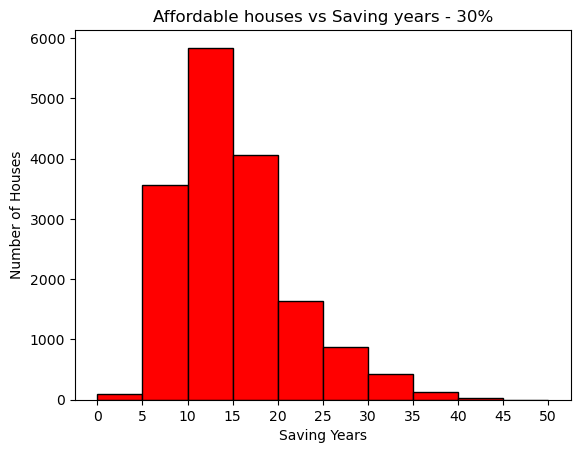

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

column = 'Saving Years- S 30%'
start = 0
width = 5
bins = range(start, int(max(final_df[column])) + width, width)
plt.hist(final_df[column], bins=bins, color='red', edgecolor='black')

plt.title('Affordable houses vs Saving years - 30%')
plt.xlabel('Saving Years')
plt.ylabel('Number of Houses')
plt.xticks(range(start, int(max(final_df[column])) + width, 5))

plt.show()

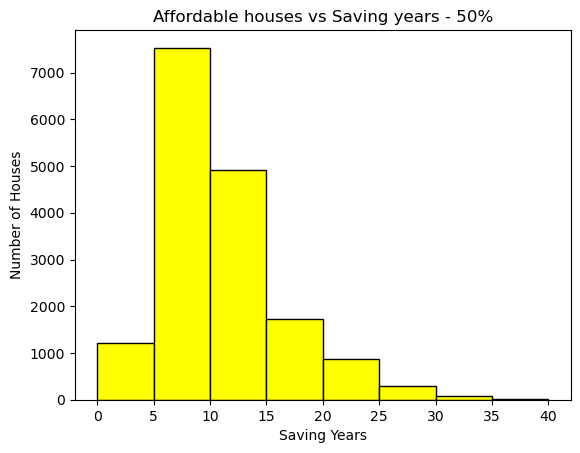

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

column = 'Saving Years- S 50%'
start = 0
width = 5
bins = range(start, int(max(final_df[column])) + width, width)
plt.hist(final_df[column], bins=bins, color='yellow', edgecolor='black')

plt.title('Affordable houses vs Saving years - 50%')
plt.xlabel('Saving Years')
plt.ylabel('Number of Houses')

plt.show()


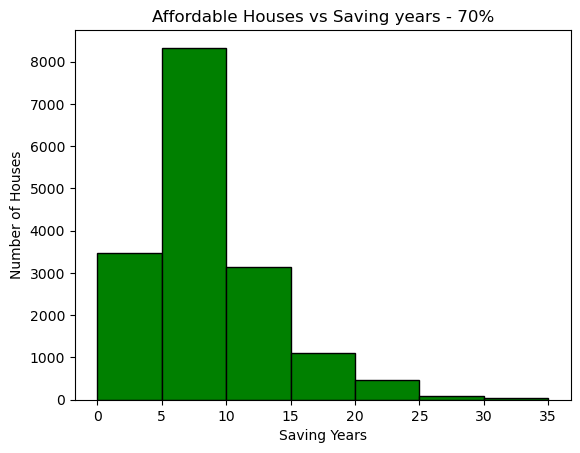

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

column = 'Saving Years- S 70%'
start = 0
width = 5
bins = range(start, int(max(final_df[column])) + width, width)
plt.hist(final_df[column], bins=bins,color='green', edgecolor='black')

plt.title('Affordable Houses vs Saving years - 70%')
plt.xlabel('Saving Years')
plt.ylabel('Number of Houses')
plt.show()







# Available Houses

__Affordable houses in 5 years with a 30% saving effort__

In [27]:
filtered_df30 = final_df[(final_df['Saving Years- S 30%'] < 5)]
filtered_df30

,Unnamed: 0,HouseID,Title,Parish,Price,Gross_Area,Typology,Price per Square Meter,Website,Downpay,...,Saving Years- S 50%,Saving Years- S 70%,Mortgage,Loan Cost,Salary 30,Salary 50,Salary 70,effort 30,effort 50,effort 70
34,34,32479561.0,Estúdio T0 à venda na travessa da Madre Silva,Ajuda,115000.0,26.0,T0,4423.0,Idealista,23000.0,...,2.61,1.90,396.03,190094.4,1835.11,1602.8600,1498.00,0.215807,0.247077,0.264372
61,61,32437406.0,Estúdio T0 à venda em Alfama - Sé,Santa Maria Maior,130000.0,20.0,T0,6500.0,Idealista,26000.0,...,2.90,2.18,447.68,214886.4,1835.11,1602.8600,1602.86,0.243953,0.279301,0.279301
66,66,32004008.0,Estúdio T0 à venda em Lapa,Estrela,137500.0,30.0,T0,4583.0,Idealista,27500.0,...,3.11,2.28,473.51,227284.8,1835.11,1715.0602,1602.86,0.258028,0.276089,0.295416
68,68,31595054.0,Estúdio T0 à venda em Santa Engrácia,São Vicente,125000.0,30.0,T0,4167.0,Idealista,25000.0,...,2.81,2.11,430.46,206620.8,1835.11,1602.8600,1602.86,0.234569,0.268557,0.268557
99,99,30067741.0,"Estúdio T0 à venda na rua da Costa, 66",Estrela,115000.0,30.0,T0,3833.0,Idealista,23000.0,...,2.61,1.90,396.03,190094.4,1835.11,1602.8600,1498.00,0.215807,0.247077,0.264372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13495,13567,,"Apartamento T2 em Lumiar, Lisboa",Lumiar,130000.0,80.0,T2,1625.0,Supercasa,26000.0,...,2.90,2.18,447.68,214886.4,1835.11,1602.8600,1602.86,0.243953,0.279301,0.279301
13522,13595,,"Casa Antiga T2 em Marvila, Lisboa",Marvila,110000.0,30.0,T2,3667.0,Supercasa,22000.0,...,2.51,1.83,378.81,181828.8,1715.06,1602.8600,1498.00,0.220873,0.236334,0.252877
13535,13608,,"Apartamento T2 em Marvila, Lisboa",Marvila,125000.0,65.0,T2,1923.0,Supercasa,25000.0,...,2.81,2.11,430.46,206620.8,1835.11,1602.8600,1602.86,0.234569,0.268557,0.268557
16579,16761,,"Apartamento T4 em Santa Clara, Lisboa",Santa Clara,140000.0,103.0,T4+,1359.0,Supercasa,28000.0,...,3.16,2.32,482.12,231417.6,1835.11,1715.0602,1602.86,0.262720,0.281110,0.300787


In [28]:
filtered_df30["Typology"].value_counts()

T0     40
T1     38
T2      9
T4+     7
Name: Typology, dtype: int64

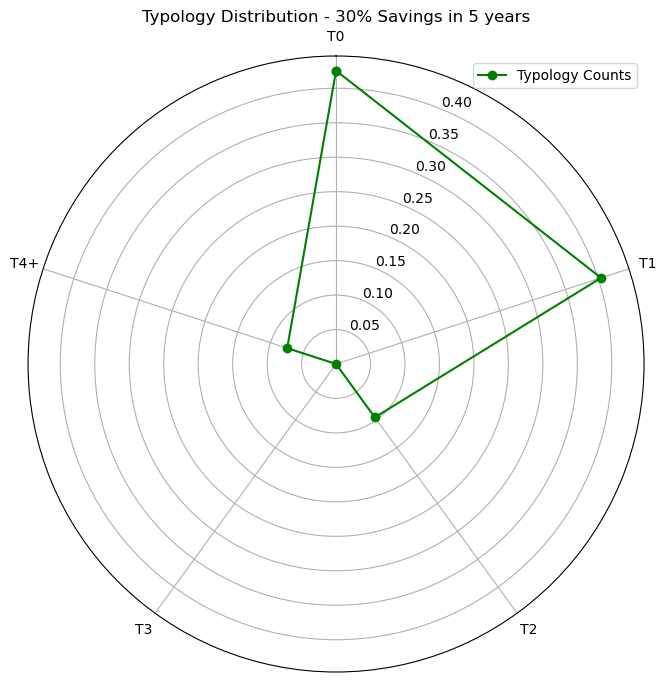

In [29]:
import matplotlib.pyplot as plt
import numpy as np

typologies = ['T0', 'T1', 'T2', 'T3', 'T4+']
typology_counts = filtered_df30["Typology"].value_counts().reindex(typologies, fill_value=0)

N = len(typologies)

# Calculate the angles of the different axes
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

# Create the radar plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

# Set the axis labels
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), typologies)

# Convert the count values to a normalized scale (0-1)
values = typology_counts.values / len(filtered_df30)

# Plot the radar chart
ax.plot(angles, values.tolist() + values.tolist()[:1], 'o-', color='green', label='Typology Counts')



plt.legend(loc='upper right')
plt.title("Typology Distribution - 30% Savings in 5 years")
plt.show()


In [30]:
(len(filtered_df30)/len(final_df))*100

0.5642934325849441

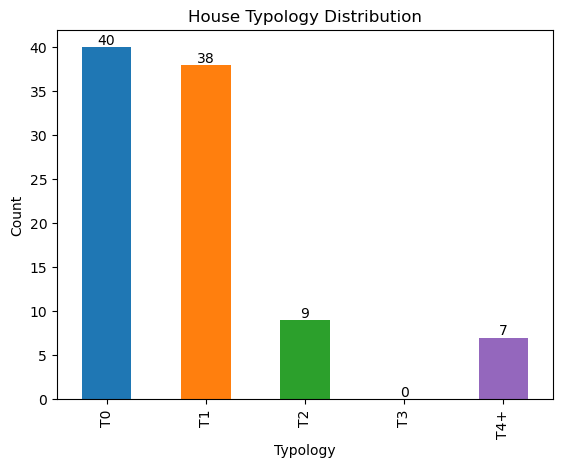

In [31]:
import matplotlib.pyplot as plt
typologies = ['T0', 'T1', 'T2', 'T3', 'T4+']
typology_counts = filtered_df30["Typology"].value_counts().reindex(typologies, fill_value=0)

colors = plt.cm.tab10(range(len(typologies)))
ax = typology_counts.plot.bar(color=colors)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xlabel("Typology")
plt.ylabel("Count")
plt.title("House Typology Distribution")

plt.show()








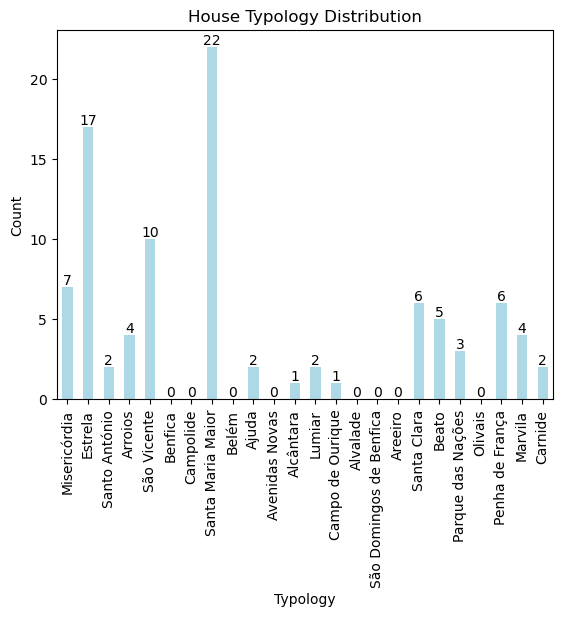

In [33]:
import matplotlib.pyplot as plt
parishes=final_df["Parish"].unique()
parish_counts = filtered_df30["Parish"].value_counts().reindex(parishes, fill_value=0)

colors = plt.cm.tab10(range(len(parishes)))
ax = parish_counts.plot.bar(color="lightblue")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xlabel("Typology")
plt.ylabel("Count")
plt.title("House Typology Distribution")

plt.show()

In [34]:
filtered_df30[(filtered_df30['effort 30'] <0.3 )]

,Unnamed: 0,HouseID,Title,Parish,Price,Gross_Area,Typology,Price per Square Meter,Website,Downpay,...,Saving Years- S 50%,Saving Years- S 70%,Mortgage,Loan Cost,Salary 30,Salary 50,Salary 70,effort 30,effort 50,effort 70
34,34,32479561.0,Estúdio T0 à venda na travessa da Madre Silva,Ajuda,115000.0,26.0,T0,4423.0,Idealista,23000.0,...,2.61,1.90,396.03,190094.4,1835.11,1602.8600,1498.00,0.215807,0.247077,0.264372
61,61,32437406.0,Estúdio T0 à venda em Alfama - Sé,Santa Maria Maior,130000.0,20.0,T0,6500.0,Idealista,26000.0,...,2.90,2.18,447.68,214886.4,1835.11,1602.8600,1602.86,0.243953,0.279301,0.279301
66,66,32004008.0,Estúdio T0 à venda em Lapa,Estrela,137500.0,30.0,T0,4583.0,Idealista,27500.0,...,3.11,2.28,473.51,227284.8,1835.11,1715.0602,1602.86,0.258028,0.276089,0.295416
68,68,31595054.0,Estúdio T0 à venda em Santa Engrácia,São Vicente,125000.0,30.0,T0,4167.0,Idealista,25000.0,...,2.81,2.11,430.46,206620.8,1835.11,1602.8600,1602.86,0.234569,0.268557,0.268557
99,99,30067741.0,"Estúdio T0 à venda na rua da Costa, 66",Estrela,115000.0,30.0,T0,3833.0,Idealista,23000.0,...,2.61,1.90,396.03,190094.4,1835.11,1602.8600,1498.00,0.215807,0.247077,0.264372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13495,13567,,"Apartamento T2 em Lumiar, Lisboa",Lumiar,130000.0,80.0,T2,1625.0,Supercasa,26000.0,...,2.90,2.18,447.68,214886.4,1835.11,1602.8600,1602.86,0.243953,0.279301,0.279301
13522,13595,,"Casa Antiga T2 em Marvila, Lisboa",Marvila,110000.0,30.0,T2,3667.0,Supercasa,22000.0,...,2.51,1.83,378.81,181828.8,1715.06,1602.8600,1498.00,0.220873,0.236334,0.252877
13535,13608,,"Apartamento T2 em Marvila, Lisboa",Marvila,125000.0,65.0,T2,1923.0,Supercasa,25000.0,...,2.81,2.11,430.46,206620.8,1835.11,1602.8600,1602.86,0.234569,0.268557,0.268557
16579,16761,,"Apartamento T4 em Santa Clara, Lisboa",Santa Clara,140000.0,103.0,T4+,1359.0,Supercasa,28000.0,...,3.16,2.32,482.12,231417.6,1835.11,1715.0602,1602.86,0.262720,0.281110,0.300787


__Affordable houses in 5 years with a 50% saving effort__

In [35]:
filtered_df50 = final_df[(final_df['Saving Years- S 50%'] < 5)]

In [36]:
filtered_df50["Typology"].value_counts()

T1     589
T2     300
T0     199
T3     116
T4+     12
Name: Typology, dtype: int64

In [37]:
(len(filtered_df50)/len(final_df))*100

7.299795893864809

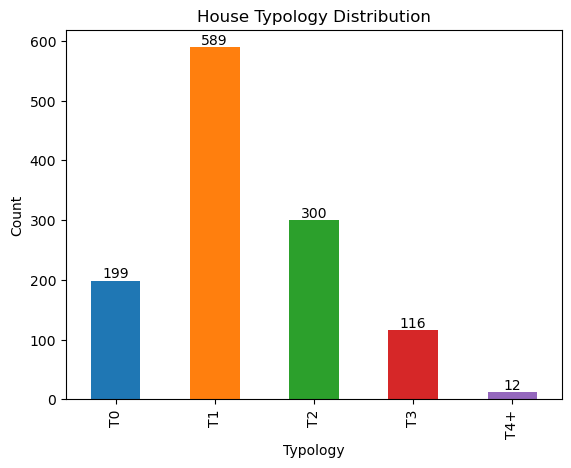

In [38]:
import matplotlib.pyplot as plt
typologies = ['T0', 'T1', 'T2', 'T3', 'T4+']
typology_counts = filtered_df50["Typology"].value_counts().reindex(typologies, fill_value=0)

colors = plt.cm.tab10(range(len(typologies)))
ax = typology_counts.plot.bar(color=colors)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xlabel("Typology")
plt.ylabel("Count")
plt.title("House Typology Distribution")

plt.show()


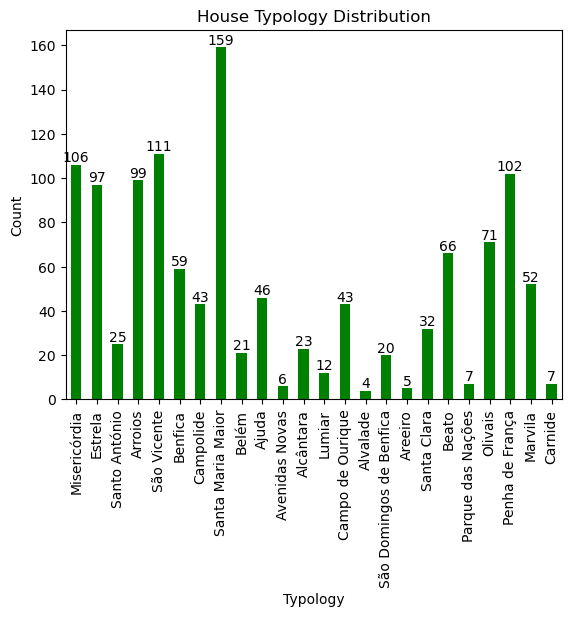

In [41]:
import matplotlib.pyplot as plt
parishes=final_df["Parish"].unique()
parish_counts = filtered_df50["Parish"].value_counts().reindex(parishes, fill_value=0)

colors = plt.cm.tab10(range(len(parishes)))
ax = parish_counts.plot.bar(color="green")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xlabel("Typology")
plt.ylabel("Count")
plt.title("House Typology Distribution")

plt.show()

<div class="alert alert-block alert-warning">

<a id='basic'></a>

## Use Case
    
</div>

__1. Affordable houses in 5 years with a 70% saving effort__

In [44]:
filtered_df70 = final_df[(final_df['Saving Years- S 70%'] < 5)]
filtered_df70

,Unnamed: 0,HouseID,Title,Parish,Price,Gross_Area,Typology,Price per Square Meter,Website,Downpay,...,Saving Years- S 50%,Saving Years- S 70%,Mortgage,Loan Cost,Salary 30,Salary 50,Salary 70,effort 30,effort 50,effort 70
1,1,32598993.0,"Estúdio T0 à venda na avenida 24 de Julho, 178",Estrela,265000.0,36.0,T0,7361.0,Idealista,53000.0,...,5.44,4.11,912.58,438038.4,2405.46,1963.572423,1835.114414,0.379379,0.464755,0.497288
2,2,32598992.0,"Estúdio T0 à venda na avenida 24 de Julho, 178",Estrela,260000.0,40.0,T0,6500.0,Idealista,52000.0,...,5.36,3.99,895.36,429772.8,2405.46,1963.572423,1715.060200,0.372220,0.455985,0.522057
5,5,32610068.0,"Estúdio T0 à venda na praça do Chile , 16",Arroios,260000.0,34.0,T0,7647.0,Idealista,52000.0,...,5.36,3.99,895.36,429772.8,2405.46,1963.572423,1715.060200,0.372220,0.455985,0.522057
6,6,32365756.0,Estúdio T0 à venda em Bica - Santa Catarina,Misericórdia,200000.0,40.0,T0,5000.0,Idealista,40000.0,...,4.29,3.21,688.74,330595.2,2101.02,1835.114414,1715.060200,0.327812,0.375312,0.401584
7,7,32620497.0,Estúdio T0 à venda em Santa Engrácia,São Vicente,299900.0,63.0,T0,4760.0,Idealista,59980.0,...,5.99,4.54,1032.77,495729.6,2405.46,1963.572423,1835.114414,0.429344,0.525965,0.562782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16581,16763,,"Apartamento T4 em Santa Clara, Lisboa",Santa Clara,245000.0,126.0,T4+,1944.0,Supercasa,49000.0,...,5.12,3.79,843.71,404980.8,2248.09,1963.572423,1715.060200,0.375301,0.429681,0.491942
16643,16829,,"Apartamento T4 em São Vicente, Lisboa",São Vicente,278800.0,88.0,T4+,3168.0,Supercasa,55760.0,...,5.66,4.28,960.10,460848.0,2405.46,1963.572423,1835.114414,0.399134,0.488956,0.523183
16645,16831,,"Moradia T4 em São Vicente, Lisboa",São Vicente,135000.0,38.0,T4+,3553.0,Supercasa,27000.0,...,3.00,2.25,464.90,223152.0,1835.11,1715.060200,1602.860000,0.253336,0.271069,0.290044
16646,16832,,"Apartamento T4 Duplex em São Vicente, Lisboa",São Vicente,220000.0,52.0,T4+,4231.0,Supercasa,44000.0,...,4.63,3.47,757.61,363652.8,2248.09,1835.114414,1715.060200,0.337002,0.412841,0.441740


In [45]:
filtered_df70["effort 70"].mean()

0.50279832641144

In [46]:
filtered_df70["Typology"].value_counts()

T1     1358
T2     1194
T0      492
T3      372
T4+      63
Name: Typology, dtype: int64

In [47]:
(len(filtered_df70)/len(final_df))*100

20.884860127266176

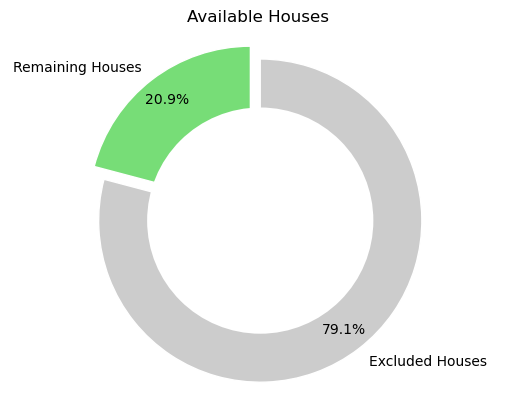

In [48]:
import matplotlib.pyplot as plt

total_length = len(final_df)
painted_length = len(filtered_df70)


unpainted_length = total_length - painted_length


labels = ['Remaining Houses', 'Excluded Houses']
sizes = [painted_length, unpainted_length]
colors = ['#77dd77', '#cccccc']  # Green and gray colors
explode = (0.1, 0)  # Explode the first slice (Filtered) for emphasis

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90, wedgeprops={'edgecolor': 'white'}, pctdistance=0.85)

# Draw a white circle at the center to create the donut shape
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title('Available Houses')

plt.axis('equal')
plt.show()


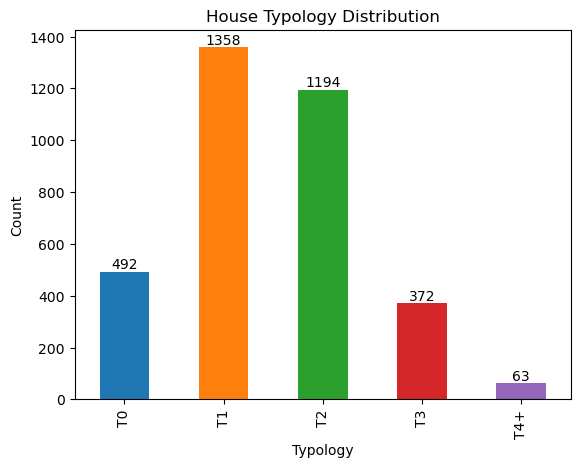

In [49]:
import matplotlib.pyplot as plt
typologies = ['T0', 'T1', 'T2', 'T3', 'T4+']
typology_counts = filtered_df70["Typology"].value_counts().reindex(typologies, fill_value=0)

colors = plt.cm.tab10(range(len(typologies)))
ax = typology_counts.plot.bar(color=colors)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xlabel("Typology")
plt.ylabel("Count")
plt.title("House Typology Distribution")

plt.show()


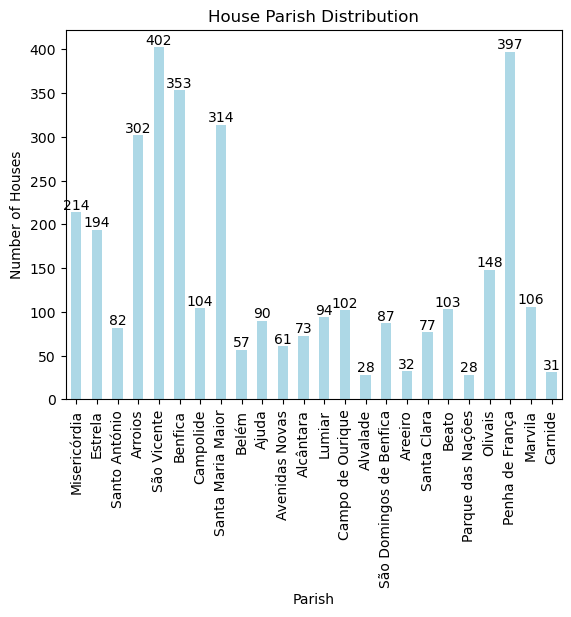

In [50]:
import matplotlib.pyplot as plt
parishes=final_df["Parish"].unique()
parish_counts = filtered_df70["Parish"].value_counts().reindex(parishes, fill_value=0)

colors = plt.cm.tab10(range(len(parishes)))
ax = parish_counts.plot.bar(color="lightblue")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xlabel("Parish")
plt.ylabel("Number of Houses")
plt.title("House Parish Distribution")

plt.show()

__2. Loan effort rate inferior to 40%__

In [51]:
filtered_df70[(filtered_df70['effort 70'] <0.4 )]

,Unnamed: 0,HouseID,Title,Parish,Price,Gross_Area,Typology,Price per Square Meter,Website,Downpay,...,Saving Years- S 50%,Saving Years- S 70%,Mortgage,Loan Cost,Salary 30,Salary 50,Salary 70,effort 30,effort 50,effort 70
18,18,31194002.0,Estúdio T0 à venda em Castelo - Mouraria,Santa Maria Maior,173500.0,30.0,T0,5783.0,Idealista,34700.0,...,3.76,2.78,597.48,286790.4,1963.57,1715.060200,1602.8600,0.304283,0.348373,0.372759
27,27,32407326.0,"Estúdio T0 à venda , Calçada do Forte",São Vicente,162500.0,30.0,T0,5417.0,Idealista,32500.0,...,3.56,2.63,559.60,268608.0,1963.57,1715.060200,1602.8600,0.284991,0.326286,0.349126
28,28,32275598.0,Estúdio T0 à venda na rua do Embaixador,Belém,199000.0,29.0,T0,6862.0,Idealista,39800.0,...,4.28,3.19,685.30,328944.0,2101.02,1835.114414,1715.0602,0.326175,0.373437,0.399578
34,34,32479561.0,Estúdio T0 à venda na travessa da Madre Silva,Ajuda,115000.0,26.0,T0,4423.0,Idealista,23000.0,...,2.61,1.90,396.03,190094.4,1835.11,1602.860000,1498.0000,0.215807,0.247077,0.264372
48,48,32407377.0,"Estúdio T0 à venda , Calçada do Forte",São Vicente,162500.0,30.0,T0,5417.0,Idealista,32500.0,...,3.56,2.63,559.60,268608.0,1963.57,1715.060200,1602.8600,0.284991,0.326286,0.349126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14828,14939,,"Apartamento T3 em Lumiar, Lisboa",Lumiar,185000.0,91.0,T3,2033.0,Supercasa,37000.0,...,3.97,2.94,637.08,305798.4,2101.02,1715.060200,1602.8600,0.303224,0.371462,0.397465
14937,15051,,"Apartamento T3 em Marvila, Lisboa",Marvila,194900.0,65.0,T3,2998.0,Supercasa,38980.0,...,4.21,3.14,671.18,322166.4,2101.02,1835.114414,1715.0602,0.319454,0.365743,0.391345
15633,15768,,"Apartamento T3 em Penha de França, Lisboa",Penha de França,199000.0,68.0,T3,2926.0,Supercasa,39800.0,...,4.28,3.19,685.30,328944.0,2101.02,1835.114414,1715.0602,0.326175,0.373437,0.399578
16579,16761,,"Apartamento T4 em Santa Clara, Lisboa",Santa Clara,140000.0,103.0,T4+,1359.0,Supercasa,28000.0,...,3.16,2.32,482.12,231417.6,1835.11,1715.060200,1602.8600,0.262720,0.281110,0.300787


In [52]:
filtered_df70["Typology"].value_counts()

T1     1358
T2     1194
T0      492
T3      372
T4+      63
Name: Typology, dtype: int64

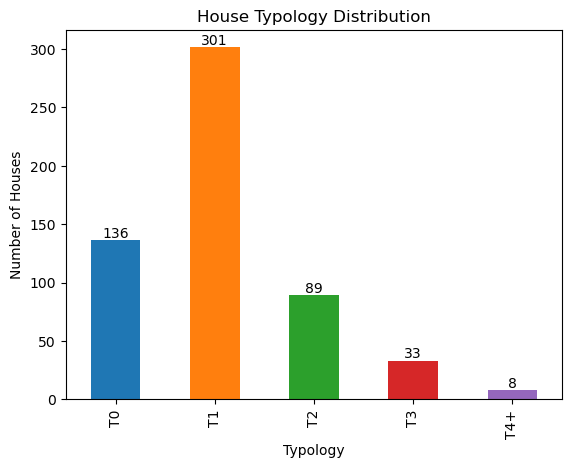

In [53]:
import matplotlib.pyplot as plt

typologies = ['T0', 'T1', 'T2', 'T3', 'T4+']
typology_counts = filtered_df70[(filtered_df70['effort 70'] < 0.4)]['Typology'].value_counts().reindex(typologies, fill_value=0)

colors = plt.cm.tab10(range(len(typologies)))
ax = typology_counts.plot.bar(color=colors)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xlabel("Typology")
plt.ylabel("Number of Houses")
plt.title("House Typology Distribution")

plt.show()


In [54]:
final_df70 = filtered_df70[(filtered_df70['effort 70'] <0.4 )]

In [55]:
len(final_df70)/len(final_df)*100

3.403769960379397

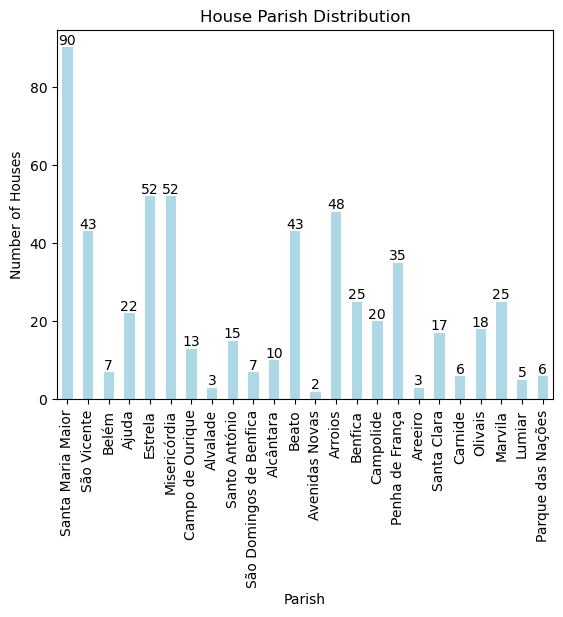

In [56]:
import matplotlib.pyplot as plt
parishes=final_df70["Parish"].unique()
parish_counts = final_df70["Parish"].value_counts().reindex(parishes, fill_value=0)

colors = plt.cm.tab10(range(len(parishes)))
ax = parish_counts.plot.bar(color="lightblue")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xlabel("Parish")
plt.ylabel("Number of Houses")
plt.title("House Parish Distribution")

plt.show()

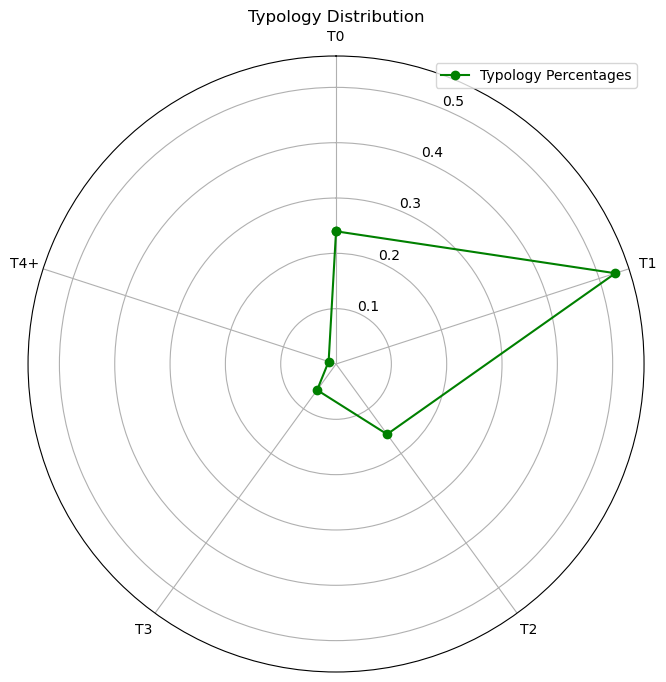

In [57]:
import matplotlib.pyplot as plt
import numpy as np

typologies = ['T0', 'T1', 'T2', 'T3', 'T4+']
typology_counts = final_df70["Typology"].value_counts().reindex(typologies, fill_value=0)

N = len(typologies)

# Calculate the angles of the different axes
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

# Create the radar plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

# Set the axis labels
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), typologies)

# Convert the count values to a normalized scale (0-1)
values = typology_counts.values / len(final_df70)

# Plot the radar chart
ax.plot(angles, values.tolist() + values.tolist()[:1], 'o-', color='green', label='Typology Percentages')


plt.legend(loc='uppper right')
plt.title("Typology Distribution")
plt.show()

__3. Filtering by T1 and T2 only__ 

In [58]:
final_df70 = final_df70[(final_df70["Typology"]== "T1") | (final_df70["Typology"]=="T2")]
final_df70

,Unnamed: 0,HouseID,Title,Parish,Price,Gross_Area,Typology,Price per Square Meter,Website,Downpay,...,Saving Years- S 50%,Saving Years- S 70%,Mortgage,Loan Cost,Salary 30,Salary 50,Salary 70,effort 30,effort 50,effort 70
426,433,32629601.0,"Apartamento T1 à venda na rua de São Bento, 510",Santo António,129900.0,67.0,T1,1939.0,Idealista,25980.0,...,2.90,2.18,447.34,214723.2,1835.11,1602.860000,1602.8600,0.243767,0.279089,0.279089
450,458,31873407.0,Apartamento T1 à venda na rua Cruz a Alcântara...,Alcântara,175000.0,45.0,T1,3889.0,Idealista,35000.0,...,3.79,2.81,602.65,289272.0,1963.57,1715.060200,1602.8600,0.306915,0.351387,0.375984
468,476,32313272.0,Apartamento T1 à venda em Centro,Penha de França,175000.0,55.0,T1,3182.0,Idealista,35000.0,...,3.79,2.81,602.65,289272.0,1963.57,1715.060200,1602.8600,0.306915,0.351387,0.375984
502,510,32636694.0,Apartamento T1 à venda na rua Reinaldo Ferreir...,Alvalade,150000.0,42.0,T1,3571.0,Idealista,30000.0,...,3.34,2.46,516.56,247948.8,1963.57,1715.060200,1602.8600,0.263072,0.301191,0.322274
527,535,32424490.0,Apartamento T1 à venda na rua Gervásio Lobato,Campo de Ourique,189900.0,48.0,T1,3956.0,Idealista,37980.0,...,4.12,3.08,653.96,313900.8,2101.02,1835.114414,1715.0602,0.311258,0.356359,0.381304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14295,14394,,"Apartamento T2 na Rua Sousa Viterbo, Penha de ...",Penha de França,199000.0,60.0,T2,3317.0,Supercasa,39800.0,...,4.28,3.19,685.30,328944.0,2101.02,1835.114414,1715.0602,0.326175,0.373437,0.399578
14323,14422,,"Apartamento T2 em Santa Clara, Lisboa",Santa Clara,180500.0,60.0,T2,3008.0,Supercasa,36100.0,...,3.89,2.88,621.59,298363.2,2101.02,1715.060200,1602.8600,0.295852,0.362430,0.387801
14337,14436,,"Apartamento T2 em Santa Maria Maior, Lisboa",Santa Maria Maior,170000.0,42.0,T2,4048.0,Supercasa,34000.0,...,3.70,2.74,585.43,281006.4,1963.57,1715.060200,1602.8600,0.298146,0.341347,0.365241
14411,14512,,"Apartamento T2 Triplex em Santa Maria Maior, L...",Santa Maria Maior,159500.0,40.0,T2,3988.0,Supercasa,31900.0,...,3.51,2.59,549.27,263649.6,1963.57,1715.060200,1602.8600,0.279730,0.320263,0.342681


In [59]:
len(final_df70)/len(final_df)*100

2.3412174330651943

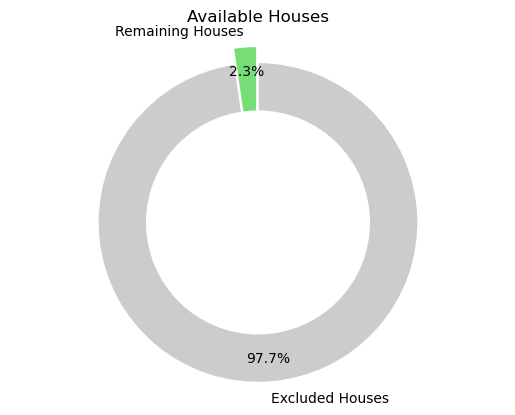

In [60]:
import matplotlib.pyplot as plt

total_length = len(final_df)
painted_length = len(final_df70)

unpainted_length = total_length - painted_length

# Create a donut chart
labels = ['Remaining Houses', 'Excluded Houses']
sizes = [painted_length, unpainted_length]
colors = ['#77dd77', '#cccccc']  # Green and gray colors
explode = (0.1, 0)  # Explode the first slice (Filtered) for emphasis

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90, wedgeprops={'edgecolor': 'white'}, pctdistance=0.85)

# Draw a white circle at the center to create the donut shape
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title('Available Houses')

plt.axis('equal')
plt.show()

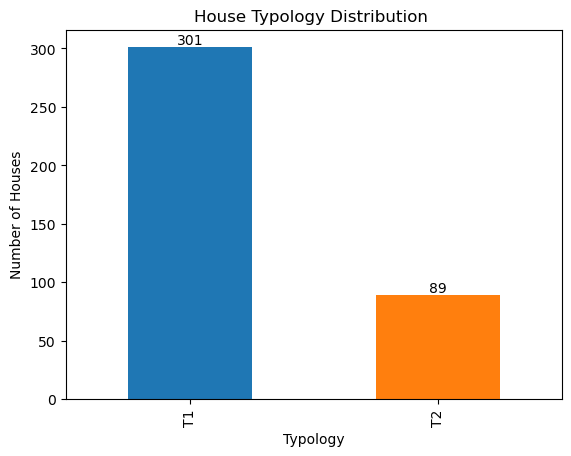

In [61]:
import matplotlib.pyplot as plt

typologies = [ 'T1', 'T2']
typology_counts = final_df70['Typology'].value_counts().reindex(typologies, fill_value=0)


colors = plt.cm.tab10(range(len(typologies)))
ax = typology_counts.plot.bar(color=colors)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xlabel("Typology")
plt.ylabel("Number of Houses")
plt.title("House Typology Distribution ")

plt.show()

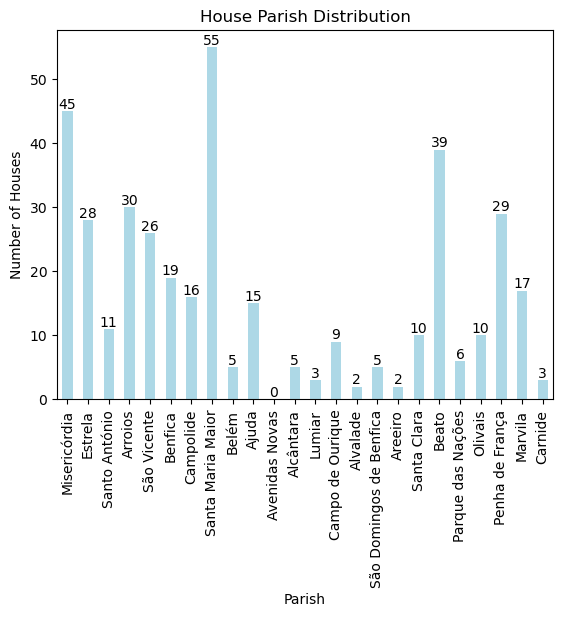

In [62]:
import matplotlib.pyplot as plt
parishes=final_df["Parish"].unique()
parish_counts = final_df70["Parish"].value_counts().reindex(parishes, fill_value=0)

colors = plt.cm.tab10(range(len(parishes)))
ax = parish_counts.plot.bar(color="lightblue")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xlabel("Parish")
plt.ylabel("Number of Houses")
plt.title("House Parish Distribution")

plt.show()

__4. Filtering by Gross Area higher than 50m<sup>2</sup>__

In [63]:
final_df70 = final_df70[(final_df70["Gross_Area"] >50)]
final_df70

,Unnamed: 0,HouseID,Title,Parish,Price,Gross_Area,Typology,Price per Square Meter,Website,Downpay,...,Saving Years- S 50%,Saving Years- S 70%,Mortgage,Loan Cost,Salary 30,Salary 50,Salary 70,effort 30,effort 50,effort 70
426,433,32629601.0,"Apartamento T1 à venda na rua de São Bento, 510",Santo António,129900.0,67.0,T1,1939.0,Idealista,25980.0,...,2.90,2.18,447.34,214723.2,1835.11,1602.860000,1602.8600,0.243767,0.279089,0.279089
468,476,32313272.0,Apartamento T1 à venda em Centro,Penha de França,175000.0,55.0,T1,3182.0,Idealista,35000.0,...,3.79,2.81,602.65,289272.0,1963.57,1715.060200,1602.8600,0.306915,0.351387,0.375984
773,781,32565089.0,Apartamento T1 à venda em Centro,Areeiro,175500.0,60.0,T1,2925.0,Idealista,35100.0,...,3.80,2.81,604.37,290097.6,1963.57,1715.060200,1602.8600,0.307791,0.352390,0.377057
841,849,32279875.0,Apartamento T1 à venda em Santa Engrácia,São Vicente,135000.0,55.0,T1,2455.0,Idealista,27000.0,...,3.00,2.25,464.90,223152.0,1835.11,1715.060200,1602.8600,0.253336,0.271069,0.290044
934,942,32265068.0,Apartamento T1 à venda na rua Fernando Gusmão,Santa Clara,170000.0,81.0,T1,2099.0,Idealista,34000.0,...,3.70,2.74,585.43,281006.4,1963.57,1715.060200,1602.8600,0.298146,0.341347,0.365241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14204,14303,,"Moradia T2 em Parque das Nações, Lisboa",Parque das Nações,180000.0,68.0,T2,2647.0,Supercasa,36000.0,...,3.88,2.87,619.87,297537.6,1963.57,1715.060200,1602.8600,0.315685,0.361428,0.386727
14205,14304,,"Apartamento T2 em Parque das Nações, Lisboa",Parque das Nações,199000.0,73.0,T2,2726.0,Supercasa,39800.0,...,4.28,3.19,685.30,328944.0,2101.02,1835.114414,1715.0602,0.326175,0.373437,0.399578
14243,14342,,"Apartamento T2 em Penha de França, Lisboa",Penha de França,175000.0,259.0,T2,676.0,Supercasa,35000.0,...,3.79,2.81,602.65,289272.0,1963.57,1715.060200,1602.8600,0.306915,0.351387,0.375984
14295,14394,,"Apartamento T2 na Rua Sousa Viterbo, Penha de ...",Penha de França,199000.0,60.0,T2,3317.0,Supercasa,39800.0,...,4.28,3.19,685.30,328944.0,2101.02,1835.114414,1715.0602,0.326175,0.373437,0.399578


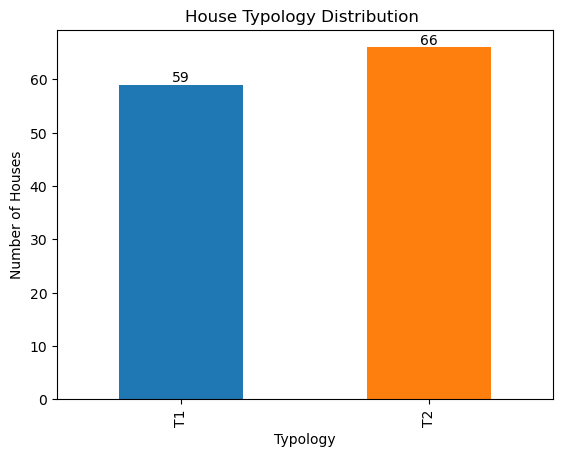

In [64]:
import matplotlib.pyplot as plt

typologies = [ 'T1', 'T2']
typology_counts = final_df70[(final_df70['effort 70'] < 0.4)]['Typology'].value_counts().reindex(typologies, fill_value=0)

colors = plt.cm.tab10(range(len(typologies)))
ax = typology_counts.plot.bar(color=colors)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xlabel("Typology")
plt.ylabel("Number of Houses")
plt.title("House Typology Distribution ")

plt.show()

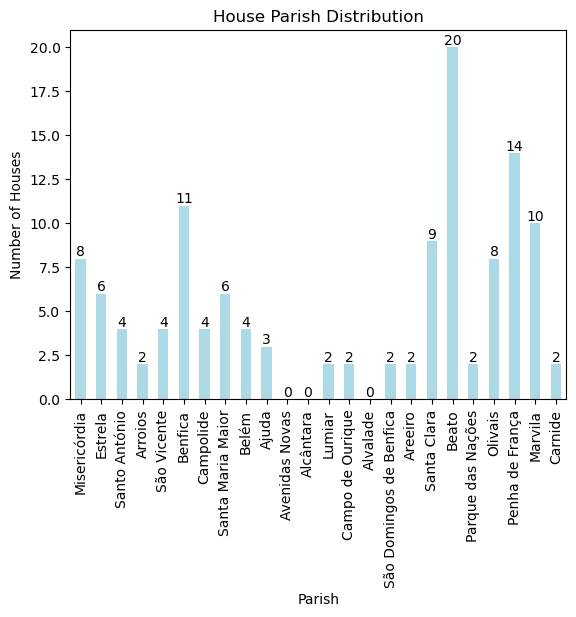

In [65]:
import matplotlib.pyplot as plt
parishes=final_df["Parish"].unique()
parish_counts = final_df70["Parish"].value_counts().reindex(parishes, fill_value=0)

colors = plt.cm.tab10(range(len(parishes)))
ax = parish_counts.plot.bar(color="lightblue")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xlabel("Parish")
plt.ylabel("Number of Houses")
plt.title("House Parish Distribution")

plt.show()

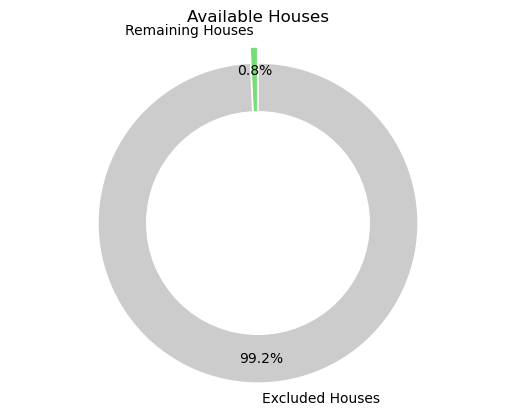

In [66]:
import matplotlib.pyplot as plt


total_length = len(final_df)
painted_length = len(final_df70)

# Calculate the length of the remaining part
unpainted_length = total_length - painted_length


labels = ['Remaining Houses', 'Excluded Houses']
sizes = [painted_length, unpainted_length]
colors = ['#77dd77', '#cccccc']  # Green and gray colors
explode = (0.1, 0)  # Explode the first slice (Filtered) for emphasis

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90, wedgeprops={'edgecolor': 'white'}, pctdistance=0.85)

# Draw a white circle at the center to create the donut shape
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title('Available Houses')


plt.axis('equal')
plt.show()

__5. Price per m<sup>2</sup> lower than the mean for the remaining houses and higher than 1500<sup>2</sup>__

In [67]:
final_df70 = final_df70[(final_df70["Price per Square Meter"] < final_df70["Price per Square Meter"].mean()) & (final_df70["Price per Square Meter"] > 1500)]
final_df70



,Unnamed: 0,HouseID,Title,Parish,Price,Gross_Area,Typology,Price per Square Meter,Website,Downpay,...,Saving Years- S 50%,Saving Years- S 70%,Mortgage,Loan Cost,Salary 30,Salary 50,Salary 70,effort 30,effort 50,effort 70
426,433,32629601.0,"Apartamento T1 à venda na rua de São Bento, 510",Santo António,129900.0,67.00,T1,1939.0,Idealista,25980.0,...,2.90,2.18,447.34,214723.2,1835.11,1602.860000,1602.8600,0.243767,0.279089,0.279089
841,849,32279875.0,Apartamento T1 à venda em Santa Engrácia,São Vicente,135000.0,55.00,T1,2455.0,Idealista,27000.0,...,3.00,2.25,464.90,223152.0,1835.11,1715.060200,1602.8600,0.253336,0.271069,0.290044
934,942,32265068.0,Apartamento T1 à venda na rua Fernando Gusmão,Santa Clara,170000.0,81.00,T1,2099.0,Idealista,34000.0,...,3.70,2.74,585.43,281006.4,1963.57,1715.060200,1602.8600,0.298146,0.341347,0.365241
967,975,32637821.0,Moradia em banda à venda em Beato,Beato,130000.0,51.00,T1,2549.0,Idealista,26000.0,...,2.90,2.18,447.68,214886.4,1835.11,1602.860000,1602.8600,0.243953,0.279301,0.279301
1373,1381,32449960.0,Apartamento T1 à venda em Santa Clara,Santa Clara,189000.0,77.00,T1,2455.0,Idealista,37800.0,...,4.11,3.00,650.86,312412.8,2101.02,1835.114414,1715.0602,0.309783,0.354670,0.379497
1382,1390,32391501.0,Apartamento T1 à venda na rua David Lopes,Penha de França,139500.0,55.00,T1,2536.0,Idealista,27900.0,...,3.15,2.31,480.40,230592.0,1835.11,1715.060200,1602.8600,0.261783,0.280107,0.299714
2040,2049,32607446.0,Apartamento T1 à venda na rua Dom Fuas Roupinho,Penha de França,128000.0,54.00,T1,2370.0,Idealista,25600.0,...,2.86,2.15,440.79,211579.2,1835.11,1602.860000,1602.8600,0.240198,0.275002,0.275002
2281,2290,32371280.0,Apartamento T1 à venda em Bica - Santa Catarina,Misericórdia,125000.0,65.00,T1,1923.0,Idealista,25000.0,...,2.81,2.11,430.46,206620.8,1835.11,1602.860000,1602.8600,0.234569,0.268557,0.268557
2464,2473,32200900.0,Apartamento T2 à venda na rua Almada Negreiros,Olivais,190000.0,72.00,T2,2639.0,Idealista,38000.0,...,4.13,3.08,654.30,314064.0,2101.02,1835.114414,1715.0602,0.311420,0.356545,0.381503
2689,2698,32396639.0,Apartamento T2 à venda em Santa Clara,Santa Clara,197000.0,75.00,T2,2627.0,Idealista,39400.0,...,4.24,3.17,678.41,325636.8,2101.02,1835.114414,1715.0602,0.322896,0.369683,0.395560


In [68]:
final_df70 = final_df70.sort_values("Price per Square Meter", ascending=True)
final_df70


,Unnamed: 0,HouseID,Title,Parish,Price,Gross_Area,Typology,Price per Square Meter,Website,Downpay,...,Saving Years- S 50%,Saving Years- S 70%,Mortgage,Loan Cost,Salary 30,Salary 50,Salary 70,effort 30,effort 50,effort 70
13495,13567,,"Apartamento T2 em Lumiar, Lisboa",Lumiar,130000.0,80.00,T2,1625.0,Supercasa,26000.0,...,2.90,2.18,447.68,214886.4,1835.11,1602.860000,1602.8600,0.243953,0.279301,0.279301
3424,3434,32639579.0,Apartamento T2 à venda em Santa Engrácia,São Vicente,185000.0,110.00,T2,1682.0,Idealista,37000.0,...,3.97,2.94,637.08,305798.4,2101.02,1715.060200,1602.8600,0.303224,0.371462,0.397465
8818,8855,ID1aBEn.html#837395db7f,Apartamento T2 para venda,Santa Clara,185000.0,108.52,T2,1705.0,Imovirtual,37000.0,...,3.97,2.94,637.08,305798.4,2101.02,1715.060200,1602.8600,0.303224,0.371462,0.397465
12813,12880,,"Apartamento T1 em Misericórdia, Lisboa",Misericórdia,125000.0,66.00,T1,1894.0,Supercasa,25000.0,...,2.81,2.11,430.46,206620.8,1835.11,1602.860000,1602.8600,0.234569,0.268557,0.268557
9418,9457,ID1b7tF.html#b3ea0d6633,Apartamento T2 para venda,Santa Clara,152000.0,80.00,T2,1900.0,Imovirtual,30400.0,...,3.37,2.49,523.44,251251.2,1963.57,1715.060200,1602.8600,0.266576,0.305202,0.326566
11559,11606,ID1abNe.html#b383a9fd0f,Apartamento T1 para venda,Misericórdia,125000.0,65.50,T1,1908.0,Imovirtual,25000.0,...,2.81,2.11,430.46,206620.8,1835.11,1602.860000,1602.8600,0.234569,0.268557,0.268557
2281,2290,32371280.0,Apartamento T1 à venda em Bica - Santa Catarina,Misericórdia,125000.0,65.00,T1,1923.0,Idealista,25000.0,...,2.81,2.11,430.46,206620.8,1835.11,1602.860000,1602.8600,0.234569,0.268557,0.268557
13535,13608,,"Apartamento T2 em Marvila, Lisboa",Marvila,125000.0,65.00,T2,1923.0,Supercasa,25000.0,...,2.81,2.11,430.46,206620.8,1835.11,1602.860000,1602.8600,0.234569,0.268557,0.268557
10908,10952,ID1b2AO.html#5b890785cf,Apartamento T2 para venda,Santa Clara,179000.0,93.00,T2,1925.0,Imovirtual,35800.0,...,3.86,2.86,616.42,295881.6,1963.57,1715.060200,1602.8600,0.313928,0.359416,0.384575
10815,10859,ID1b6Pj.html#dff864c24d,Apartamento T2 para venda,São Vicente,185000.0,96.00,T2,1927.0,Imovirtual,37000.0,...,3.97,2.94,637.08,305798.4,2101.02,1715.060200,1602.8600,0.303224,0.371462,0.397465


In [69]:
final_df70.describe()

,Unnamed: 0,Price,Gross_Area,Price per Square Meter,Downpay,Remaining cost,Saving Years- S 30%,Saving Years- S 50%,Saving Years- S 70%,Mortgage,Loan Cost,Salary 30,Salary 50,Salary 70,effort 30,effort 50,effort 70
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.00000,49.000000,49.000000,49.000000
mean,8202.224490,164991.836735,72.821837,2293.857143,32998.367347,131993.469388,5.588367,3.604898,2.676531,568.182041,272727.379592,1974.370408,1716.663060,1625.75800,0.286512,0.329795,0.348959
std,4490.908591,24314.920289,12.827321,305.414472,4862.984058,19451.936231,0.694614,0.480863,0.349807,83.733219,40191.944996,103.187721,74.985152,45.68854,0.029849,0.037948,0.046720
min,433.000000,125000.000000,51.000000,1625.000000,25000.000000,100000.000000,4.440000,2.810000,2.110000,430.460000,206620.800000,1835.110000,1602.860000,1602.86000,0.234569,0.268557,0.268557
25%,3273.000000,141500.000000,65.500000,1939.000000,28300.000000,113200.000000,4.900000,3.180000,2.340000,487.280000,233894.400000,1835.110000,1715.060200,1602.86000,0.263072,0.284118,0.304007
50%,9457.000000,170000.000000,72.000000,2388.000000,34000.000000,136000.000000,5.730000,3.700000,2.740000,585.430000,281006.400000,1963.570000,1715.060200,1602.86000,0.298146,0.341347,0.365241
75%,11606.000000,185000.000000,77.000000,2533.000000,37000.000000,148000.000000,6.180000,3.970000,2.940000,637.080000,305798.400000,2101.020000,1715.060200,1602.86000,0.311420,0.361428,0.386727
max,14303.000000,199000.000000,110.000000,2687.000000,39800.000000,159200.000000,6.530000,4.280000,3.190000,685.300000,328944.000000,2101.020000,1835.114414,1715.06020,0.326175,0.373437,0.399578


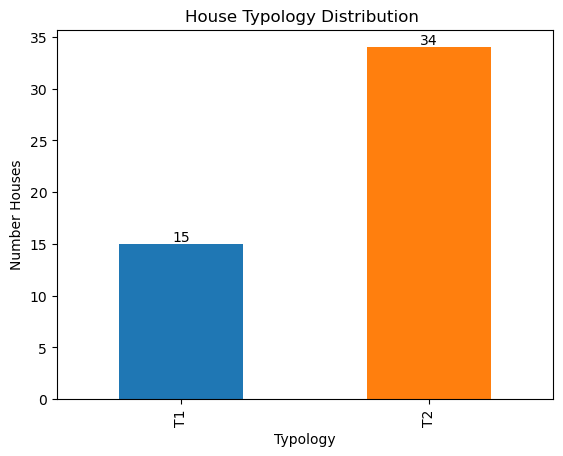

In [70]:
import matplotlib.pyplot as plt

typologies = [ 'T1', 'T2']
typology_counts = final_df70[(final_df70['effort 70'] < 0.4)]['Typology'].value_counts().reindex(typologies, fill_value=0)

colors = plt.cm.tab10(range(len(typologies)))
ax = typology_counts.plot.bar(color=colors)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xlabel("Typology")
plt.ylabel("Number Houses")
plt.title("House Typology Distribution ")

plt.show()

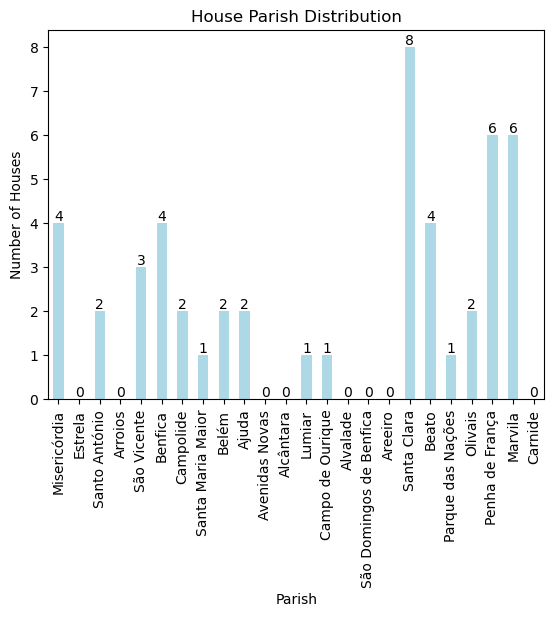

In [71]:
import matplotlib.pyplot as plt
parishes=final_df["Parish"].unique()
parish_counts = final_df70["Parish"].value_counts().reindex(parishes, fill_value=0)

colors = plt.cm.tab10(range(len(parishes)))
ax = parish_counts.plot.bar(color="lightblue")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xlabel("Parish")
plt.ylabel("Number of Houses")
plt.title("House Parish Distribution")

plt.show()

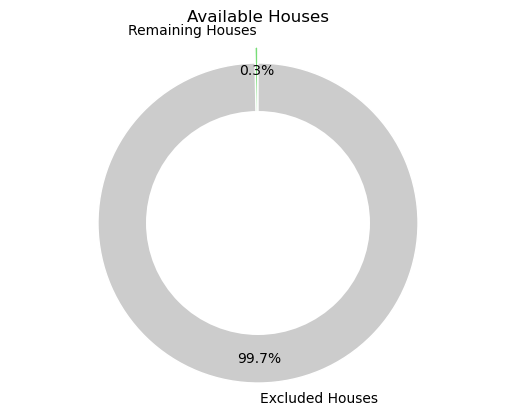

In [72]:
import matplotlib.pyplot as plt

total_length = len(final_df)
painted_length = len(final_df70)

unpainted_length = total_length - painted_length

labels = ['Remaining Houses', 'Excluded Houses']
sizes = [painted_length, unpainted_length]
colors = ['#77dd77', '#cccccc']  # Green and gray colors
explode = (0.1, 0)  # Explode the first slice (Filtered) for emphasis

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90, wedgeprops={'edgecolor': 'white'}, pctdistance=0.85)

# Draw a white circle at the center to create the donut shape
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)


plt.title('Available Houses')


plt.axis('equal')
plt.show()

Option 1:

In [73]:
final_df70[final_df70["Parish"]=="Santa Clara"]

,Unnamed: 0,HouseID,Title,Parish,Price,Gross_Area,Typology,Price per Square Meter,Website,Downpay,...,Saving Years- S 50%,Saving Years- S 70%,Mortgage,Loan Cost,Salary 30,Salary 50,Salary 70,effort 30,effort 50,effort 70
8818,8855,ID1aBEn.html#837395db7f,Apartamento T2 para venda,Santa Clara,185000.0,108.52,T2,1705.0,Imovirtual,37000.0,...,3.97,2.94,637.08,305798.4,2101.02,1715.060200,1602.8600,0.303224,0.371462,0.397465
9418,9457,ID1b7tF.html#b3ea0d6633,Apartamento T2 para venda,Santa Clara,152000.0,80.00,T2,1900.0,Imovirtual,30400.0,...,3.37,2.49,523.44,251251.2,1963.57,1715.060200,1602.8600,0.266576,0.305202,0.326566
10908,10952,ID1b2AO.html#5b890785cf,Apartamento T2 para venda,Santa Clara,179000.0,93.00,T2,1925.0,Imovirtual,35800.0,...,3.86,2.86,616.42,295881.6,1963.57,1715.060200,1602.8600,0.313928,0.359416,0.384575
934,942,32265068.0,Apartamento T1 à venda na rua Fernando Gusmão,Santa Clara,170000.0,81.00,T1,2099.0,Idealista,34000.0,...,3.70,2.74,585.43,281006.4,1963.57,1715.060200,1602.8600,0.298146,0.341347,0.365241
11080,11125,ID1autf.html#17b027eb83,Apartamento T2 para venda,Santa Clara,180500.0,83.00,T2,2175.0,Imovirtual,36100.0,...,3.89,2.88,621.59,298363.2,2101.02,1715.060200,1602.8600,0.295852,0.362430,0.387801
1373,1381,32449960.0,Apartamento T1 à venda em Santa Clara,Santa Clara,189000.0,77.00,T1,2455.0,Idealista,37800.0,...,4.11,3.00,650.86,312412.8,2101.02,1835.114414,1715.0602,0.309783,0.354670,0.379497
11336,11383,ID1aOA1.html#e5a3a467a4,APARTAMENTO T2 - LUMIAR,Santa Clara,179500.0,71.00,T2,2528.0,Imovirtual,35900.0,...,3.87,2.87,618.14,296707.2,1963.57,1715.060200,1602.8600,0.314804,0.360419,0.385648
2689,2698,32396639.0,Apartamento T2 à venda em Santa Clara,Santa Clara,197000.0,75.00,T2,2627.0,Idealista,39400.0,...,4.24,3.17,678.41,325636.8,2101.02,1835.114414,1715.0602,0.322896,0.369683,0.395560


__6. Pick 5 random houses to showcase the type of apartments available__

In [74]:
random_rows = final_df70.sample(n=5)

# Create a new DataFrame with the selected random rows
random_houses = pd.DataFrame(random_rows)

# Reset the index of the new DataFrame if needed
random_houses = random_houses.reset_index(drop=True)
random_houses

,Unnamed: 0,HouseID,Title,Parish,Price,Gross_Area,Typology,Price per Square Meter,Website,Downpay,...,Saving Years- S 50%,Saving Years- S 70%,Mortgage,Loan Cost,Salary 30,Salary 50,Salary 70,effort 30,effort 50,effort 70
0,1381,32449960.0,Apartamento T1 à venda em Santa Clara,Santa Clara,189000.0,77.0,T1,2455.0,Idealista,37800.0,...,4.11,3.00,650.86,312412.8,2101.02,1835.114414,1715.0602,0.309783,0.354670,0.379497
1,11457,ID1aJMC.html#c4ca2f962b,Apartamento T2 Chelas Lisboa - Oportunidade de...,Marvila,158000.0,74.5,T2,2121.0,Imovirtual,31600.0,...,3.48,2.57,544.10,261168.0,1963.57,1715.060200,1602.8600,0.277097,0.317248,0.339456
2,433,32629601.0,"Apartamento T1 à venda na rua de São Bento, 510",Santo António,129900.0,67.0,T1,1939.0,Idealista,25980.0,...,2.90,2.18,447.34,214723.2,1835.11,1602.860000,1602.8600,0.243767,0.279089,0.279089
3,11435,ID1aYAz.html#563e7706c8,"Apartamento T2, Lisboa",Belém,180000.0,69.0,T2,2609.0,Imovirtual,36000.0,...,3.88,2.87,619.87,297537.6,1963.57,1715.060200,1602.8600,0.315685,0.361428,0.386727
4,3925,32000235.0,Apartamento T2 à venda em Arneiros,Benfica,184500.0,75.0,T2,2460.0,Idealista,36900.0,...,3.96,2.94,635.36,304972.8,2101.02,1715.060200,1602.8600,0.302405,0.370459,0.396391
